<a href="https://colab.research.google.com/github/leticiaaraujoUCL/IA-UCL/blob/main/Visualiza%C3%A7%C3%A3o%20de%20Dados/Visualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## **Método 01: Intervalo Interquartil (IQR)**

In [35]:
df_1 = pd.read_csv("https://raw.githubusercontent.com/leticiaaraujoUCL/IA-UCL/main/Visualiza%C3%A7%C3%A3o%20de%20Dados/heart.csv")
df_1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: ylabel='chol'>

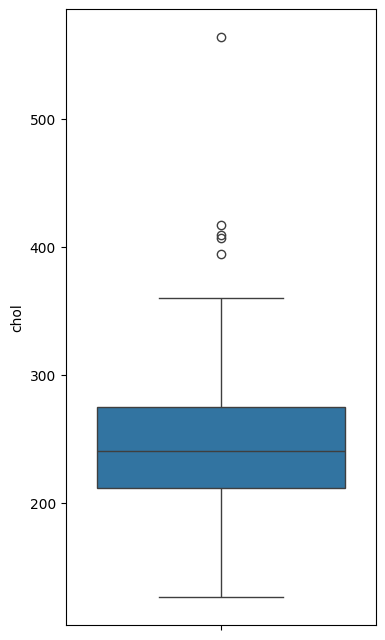

In [36]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df_1.chol)

In [69]:
def out_iqr(df, column):
    global lower, upper, outlier_indices
    # Calcular o primeiro e o terceiro quartil
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # Calcular o IQR
    iqr = q75 - q25
    # Calcular o valor de corte para outliers
    cut_off = iqr * 1.5
    # Calcular os valores limite inferior e superior
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is', iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)

    # Encontrar os índices dos outliers
    outlier_indices = df[(df[column] > upper) | (df[column] < lower)].index.tolist()

    print('Total number of outliers are', len(outlier_indices))
    return outlier_indices

In [71]:
outlier_indices = out_iqr(df_1, 'chol')

The IQR is 63.5
The lower bound value is 115.75
The upper bound value is 369.75
Total number of outliers are 5


<ipython-input-38-425bc76260b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1.chol, kde=False)


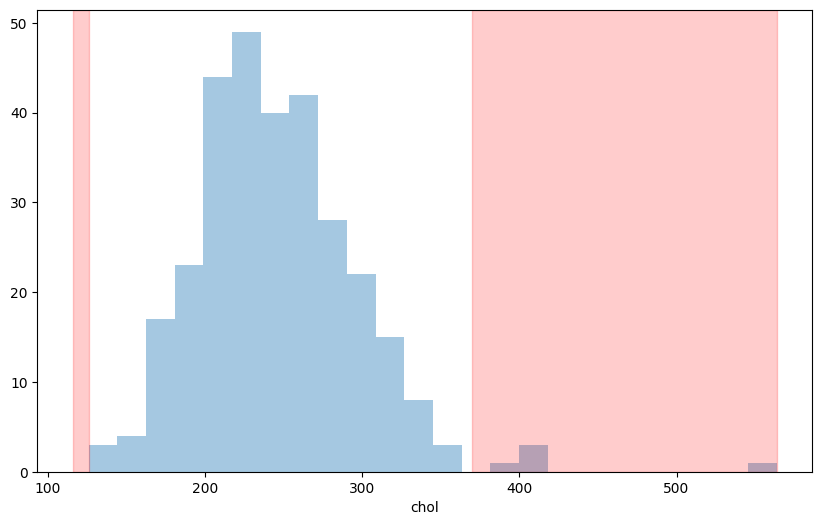

In [38]:
plt.figure(figsize = (10,6))
sns.distplot(df_1.chol, kde=False)
plt.axvspan(xmin = lower,xmax= df_1.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_1.chol.max(),alpha=0.2, color='red')

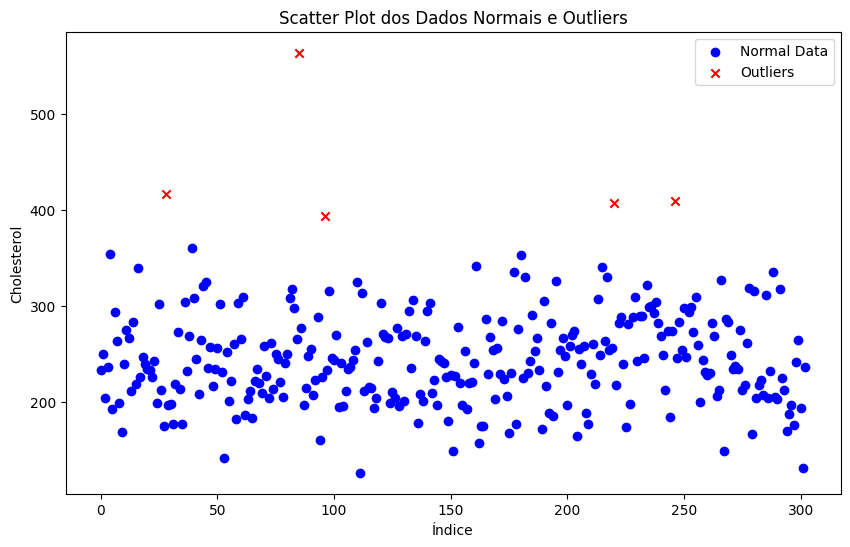

In [72]:
# Plotar os dados normais e os outliers
plt.figure(figsize=(10, 6))

# Dados normais (sem outliers)
normal_df = df_1.drop(index=outlier_indices)
plt.scatter(normal_df.index, normal_df['chol'], color='blue', label='Normal Data', marker='o')

# Outliers
outlier_df = df_1.loc[outlier_indices]
plt.scatter(outlier_df.index, outlier_df['chol'], color='red', label='Outliers', marker='x')

plt.xlabel('Índice')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot dos Dados Normais e Outliers')
plt.legend()
plt.show()

## **Método 02: Desvio Padrão**

In [39]:
df_2 = pd.read_csv("https://raw.githubusercontent.com/leticiaaraujoUCL/IA-UCL/main/Visualiza%C3%A7%C3%A3o%20de%20Dados/StudentsPerformance.csv")
df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<ipython-input-40-0b9b0620a381>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['writing score'])


<Axes: xlabel='writing score', ylabel='Density'>

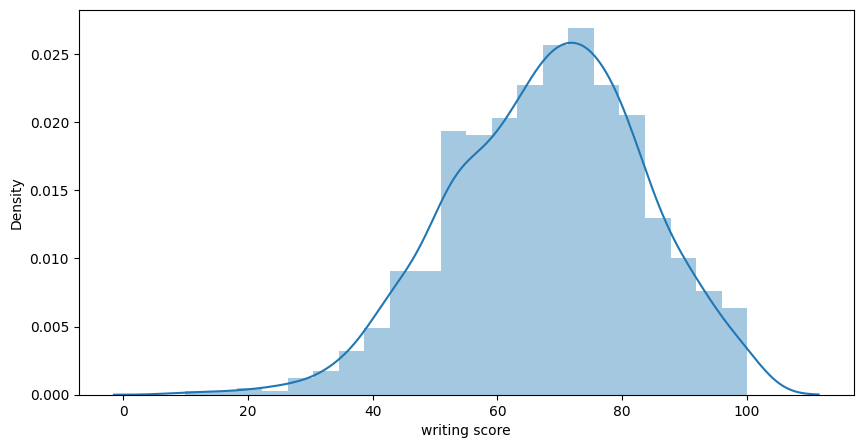

In [40]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'])

In [60]:
def out_std(df, column):
    global lower, upper, outlier_indices
    # Calcular a média e o desvio padrão da coluna do DataFrame
    data_mean, data_std = df[column].mean(), df[column].std()
    # Calcular o valor de corte (cutoff)
    cut_off = data_std * 3
    # Calcular os valores limite inferior e superior
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)

    # Encontrar os índices dos outliers
    outlier_indices = df[(df[column] > upper) | (df[column] < lower)].index.tolist()

    print('Total number of outliers are', len(outlier_indices))
    return outlier_indices

In [61]:
outlier_indices = out_std(df_2,'writing score')

The lower bound value is 22.46702896739105
The upper bound value is 113.64097103260895
Total number of outliers are 4


<ipython-input-62-0c42a8a4b9f9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['writing score'], kde=False)


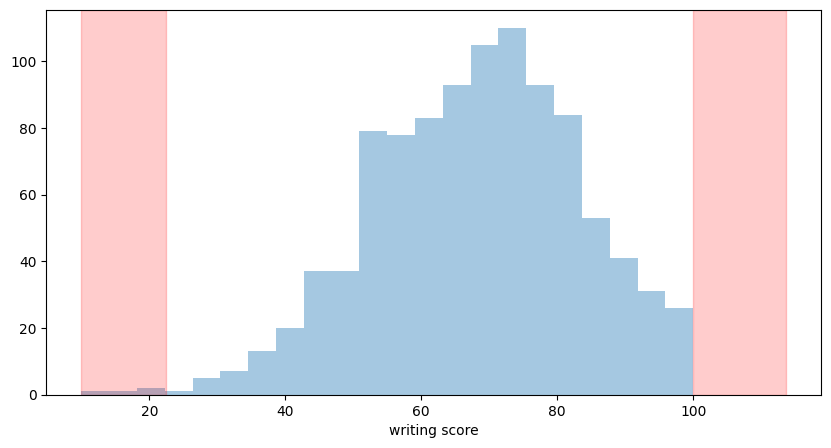

In [62]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'], kde=False)
plt.axvspan(xmin = lower,xmax= df_2['writing score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_2['writing score'].max(),alpha=0.2, color='red')

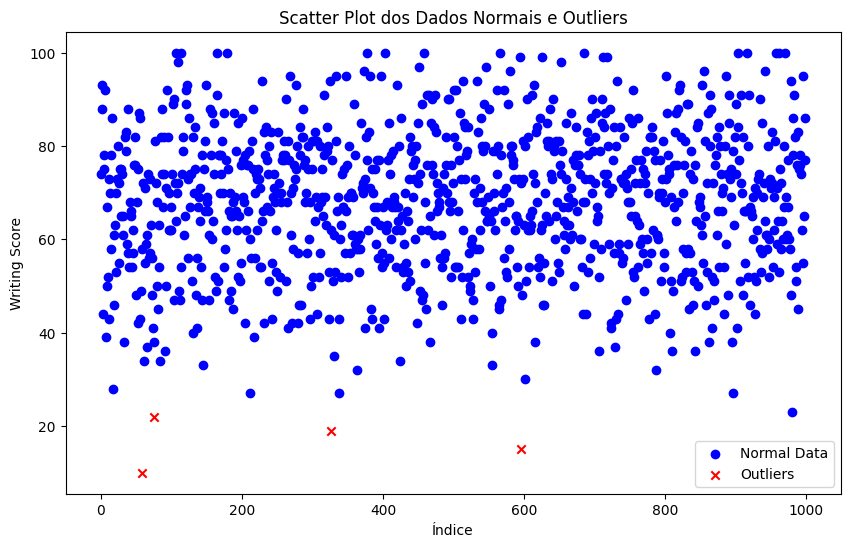

In [68]:
# Plotar os dados normais e os outliers
plt.figure(figsize=(10, 6))

# Dados normais (sem outliers)
normal_df = df_2.drop(index=outlier_indices)
plt.scatter(normal_df.index, normal_df['writing score'], color='blue', label='Normal Data', marker='o')

# Outliers
outlier_df = df_2.loc[outlier_indices]
plt.scatter(outlier_df.index, outlier_df['writing score'], color='red', label='Outliers', marker='x')

plt.xlabel('Índice')
plt.ylabel('Writing Score')
plt.title('Scatter Plot dos Dados Normais e Outliers')
plt.legend()
plt.show()


## **Método 03: Z score**

In [44]:
df_3 = pd.read_csv("https://raw.githubusercontent.com/leticiaaraujoUCL/IA-UCL/main/Visualiza%C3%A7%C3%A3o%20de%20Dados/insurance.csv")
df_3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
df_3.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-46-a7ebde9608cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_3['charges'])


<Axes: xlabel='charges', ylabel='Density'>

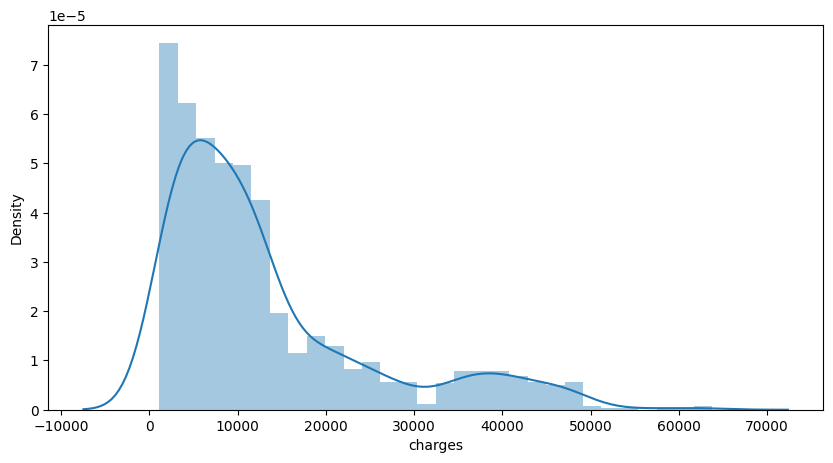

In [46]:
plt.figure(figsize = (10,5))
sns.distplot(df_3['charges'])

In [53]:
def out_zscore(data):
    global outliers, zscore, outlier_indices
    outliers = []
    zscore = []
    outlier_indices = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for index, value in enumerate(data):
        z_score = (value - mean) / std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(value)
            outlier_indices.append(index)

    print("Total number of outliers are", len(outliers))
    return outlier_indices

In [55]:
outlier_indices = out_zscore(df_3.charges)

Total number of outliers are 7


<ipython-input-56-9d610b74ef1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zscore)


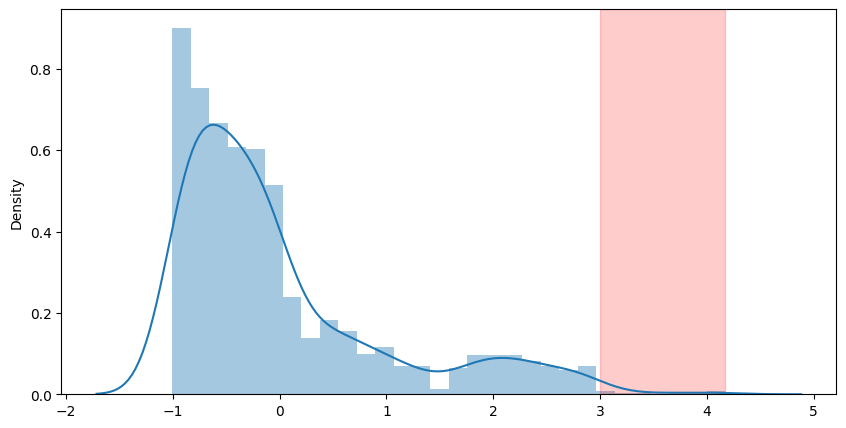

In [56]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

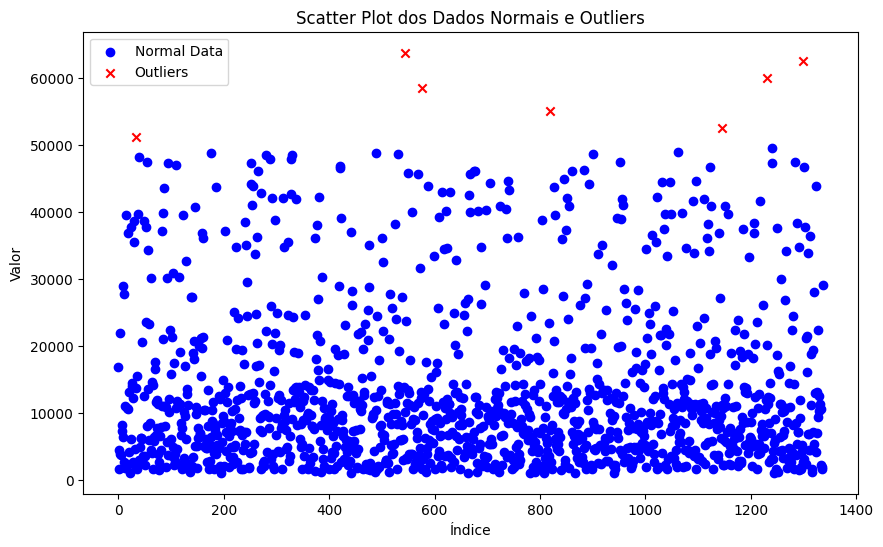

In [58]:
# Plotar os dados normais e os outliers
plt.figure(figsize=(10, 6))

# Dados normais (sem outliers)
normal_data = np.delete(df_3.charges, outlier_indices)
normal_indices = [i for i in range(len(df_3.charges)) if i not in outlier_indices]
plt.scatter(normal_indices, normal_data, color='blue', label='Normal Data', marker='o')

# Outliers
plt.scatter(outlier_indices, [df_3.charges[i] for i in outlier_indices], color='red', label='Outliers', marker='x')

plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Scatter Plot dos Dados Normais e Outliers')
plt.legend()
plt.show()